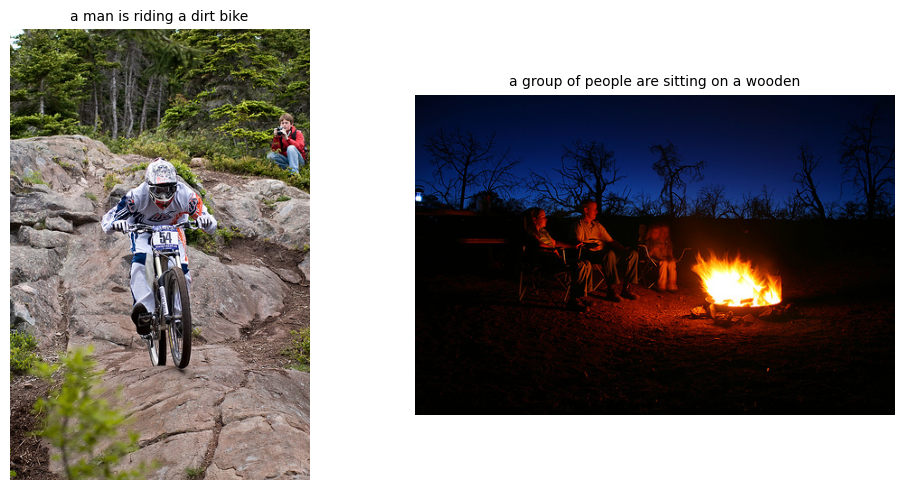

In [11]:
%matplotlib inline

import sys
import os
import random

sys.path.append(os.path.abspath(".."))

import numpy as np
import matplotlib.pyplot as plt
import cv2

from src.config import *
from src.inference import load_model, load_vocab, generate_caption_beam

# Load model
word2idx, idx2word = load_vocab()
model = load_model(len(word2idx))

val_features_dir = os.path.join(FEATURES_DIR, "val")

# Randomly select 3 images
all_files = os.listdir(val_features_dir)
image_files = random.sample(all_files, 2)

plt.figure(figsize=(15, 5))

for i, file in enumerate(image_files):

    feature_path = os.path.join(val_features_dir, file)
    features = np.load(feature_path)

    caption, _ = generate_caption_beam(
        model, features, word2idx, idx2word, beam_size=3
    )

    image_name = file.replace(".npy", "")
    image_path = os.path.join(RAW_DATA_DIR, "Images", image_name)

    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    plt.subplot(1, 3, i + 1)
    plt.imshow(image)
    plt.title(caption, fontsize=10)
    plt.axis("off")

plt.tight_layout()
plt.show()


In [12]:
import os
import json
import numpy as np
from tqdm import tqdm

from src.config import *
from src.inference import load_model, load_vocab, generate_caption_beam

# Load vocab and model
word2idx, idx2word = load_vocab()
model = load_model(len(word2idx))

val_features_dir = os.path.join(FEATURES_DIR, "val")

# Take first 20 validation feature files
image_files = os.listdir(val_features_dir)[:20]

predictions = {}

for file in tqdm(image_files):
    
    feature_path = os.path.join(val_features_dir, file)
    features = np.load(feature_path)

    caption, _ = generate_caption_beam(
        model, features, word2idx, idx2word, beam_size=3
    )

    image_name = file.replace(".npy", "")
    predictions[image_name] = caption


# Create outputs folder if not exists
os.makedirs("outputs", exist_ok=True)

# Save JSON
with open("outputs/sample_predictions.json", "w") as f:
    json.dump(predictions, f, indent=4)

print("Saved 20 predictions to outputs/sample_predictions.json")


100%|██████████| 20/20 [00:04<00:00,  4.54it/s]

Saved 20 predictions to outputs/sample_predictions.json
